In [26]:
# Source: https://github.com/mmcuri/ds_handson/blob/master/Telecom_Churn_Prediction.ipynb


# Open In Colab
# Churn Prediction


# Companies usually have a greater focus on customer acquisition and keep retention as a secondary priority. However, it can cost five times more to attract a new customer 
# than it does to retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to 95%, according to research done by Bain & Company.

# Churn is a measurement of business that shows customers who stop doing business with a company or a service, also known as customer attrition. 
# By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans. 

# But what if you could know in advance that a specific customer is likely to leave your business, and have a chance to take proper actions in time to prevent it from happening? 
# The reasons that lead customers to the cancellation decision can be numerous, coming from poor service quality, delay on customer support, prices, 
# new competitors entering the market, and so on. Usually, there is no single reason, but a combination of events that culminated in customer displeasure.

# If your company were not capable to identify these signals and take actions prior to the cancel button click, there is no turning back, your customer is already gone. 
# But you still have something valuable: the data. Your customer left very good clues about where you left to be desired. It can be a valuable source for meaningful 
# insights and to train customer churn models. Learn from the past, and have strategic information at hand to improve future experiences, it's all about machine learning.

# When it comes to the telecommunications segment, there is great room for opportunities. The wealth and the amount of customer data that carriers collect can 
# contribute a lot to shift from a reactive to a proactive position. The emergence of sophisticated artificial intelligence and data analytics techniques further help 
# leverage this rich data to address churn in a much more effective manner. In this article, I'm going to use a customer base dataset from an anonymous carrier, 
# made available by the platform IBM Developer.

# The main goal is to develop a machine learning model capable to predict customer churn based on the customer's data available. 
# I will use mainly Python, Pandas, and Scikit-Learn libraries for this implementation. The complete code you can find on my GitHub. To accomplish that, 
# we will go through the below steps:

# Exploratory analysis
# Data preparation
# Train, tune and evaluate machine learning models
# Project Initial Setup


# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

%matplotlib inline

# install scikit plot package
!pip install scikit-plot

!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# configure graph style
sns.set_style('darkgrid')
#palette=sns.color_palette("GnBu_d")
#palette=sns.color_palette("BuGn_r")
#palette = sns.light_palette("navy", reverse=True)
palette = sns.color_palette("coolwarm", 7)
import pandas.util.testing as tm

In [27]:
# The Data
# This dataset contains a total of 7,043 customers and 21 attributes, coming from personal characteristics, services signatures, and contract details. Out of the entries, 5,174 are active customers and 1,869 are churned, which demonstrates that the dataset is highly unbalanced. The target variable for this assessment is going to be the feature Churn.

# Importing dataset

# Loading dataset
df = pd.read_csv('churning.csv')

# check first 5 entries
df.head()

# Data Dictionary
# customerID - Custumer unique identifier
# gender - Customer gender - ['Female' 'Male']
# SeniorCitizen - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
# Partner - - ['No' 'Yes']
# Dependents - If customer has dependents - ['No' 'Yes']
# Tenure - Customer lifespan (in months)
# PhoneService - - ['No' 'Yes']
# MultipleLines - - ['No' 'No phone service' 'Yes']
# InternetService - - ['No' 'No internet service' 'Yes']
# OnlineSecurity - - ['No' 'No internet service' 'Yes']
# OnlineBackup - - ['No' 'No internet service' 'Yes']
# DeviceProtection - - ['No' 'No internet service' 'Yes']
# TechSupport - - ['No' 'No internet service' 'Yes']
# StreamingTV - - ['No' 'No internet service' 'Yes']
# StreamingMovies - - ['No' 'No internet service' 'Yes']
# Contract - Type of contract - ['Month-to-month' 'One year' 'Two year']
# PaperlessBilling - - ['No' 'Yes']
# PaymentMethod - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
# MonthlyCharges - Monthly Recurring Charges
# TotalCharges - Life time value
# Churn - Churn value, the targer vector - ['No' 'Yes']

# Dataframe size and info

def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1], 
        '\n# Entries: ', df.shape[0],'\n')
  
get_df_size(df)
# Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

# Features and data types
# The feature TotalCharges got read by Pandas as object data type. This have impacts during the exploratory analysis and have to be handled. We will convert datatype to float64 in the coming sections.


df.info()

Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null

Missing values (per feature): 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Unique values (per feature): 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod    

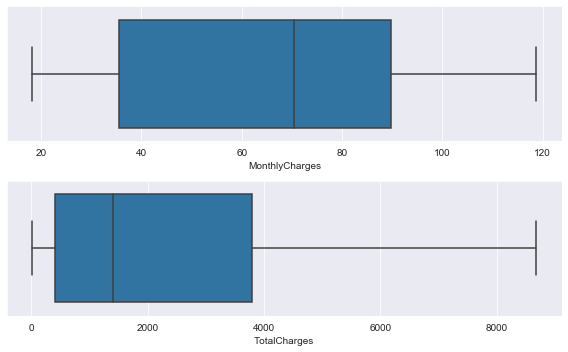

In [28]:
# Exploratory Analysis
# Checking missing values
# Before checking the missing values, we are going to replace all the blank spaces ocurreces that this dataset might have.

# replacing all the blank values with NaN 
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

# After that we can see that feature TotalCharges has 11 missing values. We are going to replace these missing values by the TotalCharges median.

total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)
# Converting data types
# While importing dataset, Pandas read the column TotalCharges as object because it had some entries populated with blank spaces instead of NaN value. For the analysis we will convert datatype of this feature from object to float64.

df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

# Unique values per feature
# By checking feature's unique values we can see that the column customerID have unique identifiers for each customer, which confirms that each row represents a single customer. This feature does not contribute for this analysis, therefore we are going to drop the column.

print("Unique values (per feature): \n{}\n".format(df.nunique()))

df_clean = df_clean.drop('customerID', axis=1)
# Descriptive statistics

df_clean.describe()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,5))

sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])

plt.tight_layout()

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
tenure
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService
['No' 'Yes']
MultipleLines
['No' 'No phone service' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'No internet service' 'Yes']
OnlineBackup
['No' 'No internet service' 'Yes']
DeviceProtection
['No' 'No internet service' 'Yes']
TechSupport
['No' 'No internet service' 'Yes']
StreamingTV
['No' 'No internet service' 'Yes']
StreamingMovies
['No' 'No internet service' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['No' 'Yes']
PaymentMethod
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges
[ 18.25  18.4   18.55 ... 118.6  118.65 118.75]
TotalCharges
[  18.8 

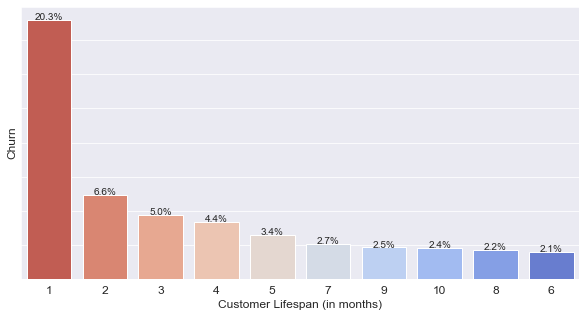

In [29]:
# Dataset features and their values
# This is a very important information to help us to undesrstand the dataset will be working with. Few observations:

# Feature SeniorCitizen is binary, entries have value 1 for Yes and 0 for No
# Feature Tenure has the max value in 72, which can indicate that this service provider has maximum of 6 years
# The only features that are not categorical are Monthly Charges and TotalCharges, all the remaining are categorical kinds

features_obj = df_clean.columns

for f in features_obj:
  print(f)
  print(np.unique(df_clean[f].values))


# Customer lifespan
# Helper Functions

def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()
    
# How long is the customer lifespan until subscription cancellation?
# The majority of churn rate is observed on the subscription first month, totalling 20,3% of subscribers leave on the first month
# Most of the subscribers leave on the first 3 months, totalling 31.9% of the total churn

p = sns.color_palette("coolwarm", 10)
p.reverse()

df_top_churn = pd.DataFrame(df_clean[df_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df_clean[df_clean['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

In [30]:
# Understanding the profile of churn customers
# Helper Functions

# helper funtion - display count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
  
  """
    Display countplot based on a set of features

    # Arguments
      cat_list: array, List of features
      df: DataFrame, dataset
      rows: int, number of rows
      columns: int, number of columns
      figsize: figure size, e.g (10, 5)

  """

  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette=palette)

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, df.shape[0])

  if export :
    save_img(fig, ax)

  plt.tight_layout()
  plt.show()

  return fig

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

def save_img(fig, ax):
  fig.savefig(ax.get_title(), dpi=600)

df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

df_churn.loc[df_churn['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df_churn.loc[df_churn['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

personal_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services_attributes = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']
contract_attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


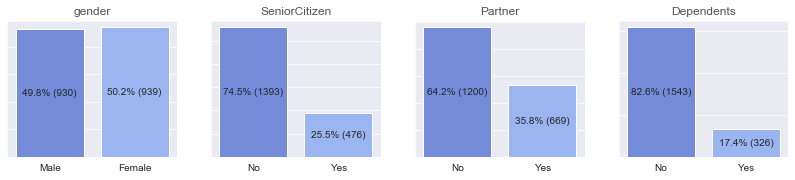

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


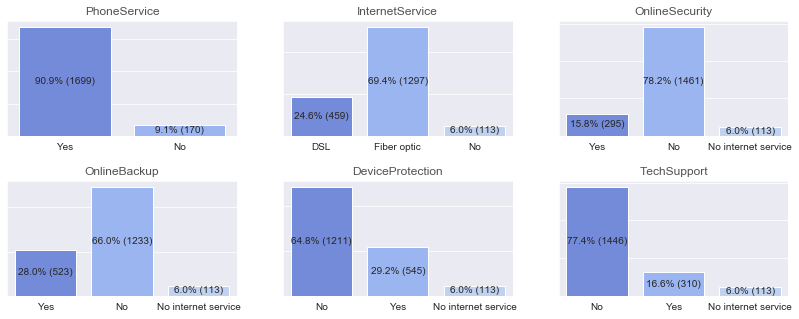

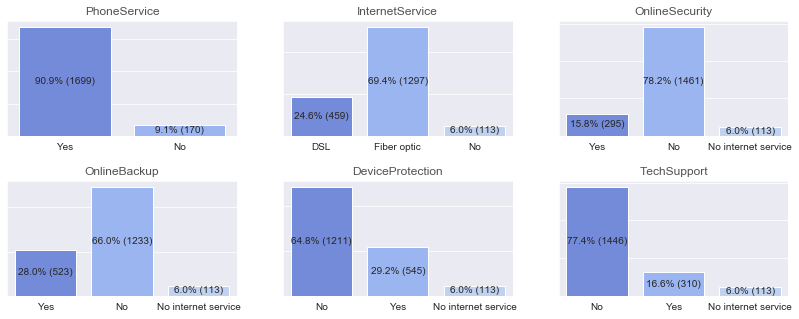

In [31]:
# a) In terms of personal attibutes
# Let's review which personal charactiristic contribute mostly for the cancellation decision. From the available dataset those are:

# Gender
# SeniorCitizen
# Partner
# Dependents
# Below charts can provide some meaningful insights such as:

# Customers without dependents are 4 times more likely to churn
# Senior citizens are 3 times less likely to churn
# Partners are almost 2 times less likely to churn

displayCountPlot(personal_attributes, df_churn, rows=1, columns=4, export=True)

# b) In terms of services
# Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

# PhoneService
# MultipleLines
# InternetService
# OnlineSecurity
# OnlineBackup
# DeviceProtection
# TechSupport
# StreamingTV
# StreamingMovies
# The below charts show the features where high discrepancies between the classes could be noticed. It gives insights regarding which kind of carrier services the customers that are more likely to defeat make use:

# The majority of customers that cancel their subscription have Phone Service enabled
# Customers that have Fiber-Optic Internet Service are more likely to cancel than those who have DSL
# Customers that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave

services_attributes_filtered = ['PhoneService', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport',]

displayCountPlot(services_attributes_filtered, df_churn, rows=3, columns=3, figsize=(14,8), export=True)

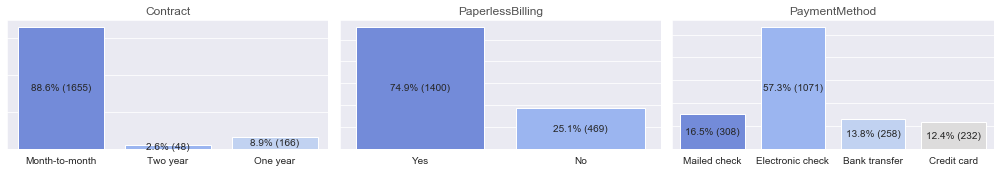

In [32]:
# c) In terms of contract aspects
# Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

# Contract
# PaperlessBilling
# PaymentMethod
# Below charts give insights regarding the contract aspects that can make a subscriber more likely to churn:

# The majority of customers that cancel their subscription have Month-to-month Contract type and Paperless Billing enabled
# Customers that have Payment Method as Eletronic Check are more likely to leave

df_churn['PaymentMethod'] = df_churn['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()

fig = displayCountPlot(contract_attributes, df_churn, rows=1, columns=3)

fig.savefig("contract.png", dpi=600)

5174
1869


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


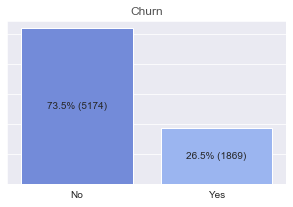

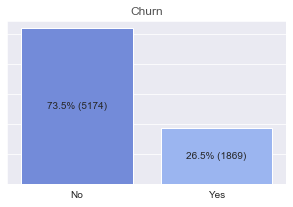

In [33]:
# Imbalanced data
# Column Churn is the target vector to be used to train the ML models. The class No have much more entries then class Yes, which demonstrates that the dataset is highly imbalanced. Ideally the dataset should be balanced to avoid models overfitting.

print(df_clean[df_clean['Churn'] == 'No'].shape[0])
print(df_clean[df_clean['Churn'] == 'Yes'].shape[0])

"""fig, ax = plt.subplots()
sns.countplot(df_clean['Churn'], palette=palette)

plt.xticks(size=12)
plt.xlabel('Churn', size=12)
plt.yticks(size=12)
plt.ylabel('# Customers', size=12)"""

displayCountPlot(['Churn'], df_clean, rows=1, columns=1, figsize=(5,3), export=True)
# 5174
# 1869

In [34]:
# Data Preparation
# Split features into binary, numeric or categorical

binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]

df_proc = df_clean.copy()
# Features encoding
# a) Apply label encoding for binary features

le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[f].values))

gender 
 ['No' 'Yes']
SeniorCitizen 
 ['No' 'Yes']
Partner 
 ['No' 'Yes']
Dependents 
 ['No' 'Yes']
PhoneService 
 ['No' 'Yes']
PaperlessBilling 
 ['No' 'Yes']
Churn 
 [0 1]


In [35]:
# b) Convert categorical variable into dummy variables

# print(categorical_feat)
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
print(df_proc.columns)

get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')

df_proc.head()
# Original dataset: 
# Attributes:  21 
# Entries:  7043 

# Processed dataset: 
# Attributes:  41 
# Entries:  7043 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [36]:
# Split train and test data

# split df_proc in feature matrix and target vector
X=df_proc.drop('Churn', axis=1)
y=df_proc['Churn']

# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Machine Learning Model
# Helper Functions

In [37]:
# cross-validation function
def val_model(X, y, clf, quite=False):
  """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores

  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

def getClfRecallScores(X_train, y_train, *clf_list):
  """
  Provides recall score gor a given list of models

  # Arguments
    X_train: X_train
    y_train: y_train
    *clf_list: list of classifiers

  # Returns
    DataFrame, recall scores

  """

  model_name = []
  recall = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    recall.append(val_model(X_train, y_train, model))
  
  return pd.DataFrame(data=recall, index=model_name, columns=['Recall']).sort_values(by='Recall', ascending=False)

In [38]:
# Balancing the data

# under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_rus, header='After balancing:')

# make sure the number of classes are equal distibuted
np.unique(y_train_rus, return_counts=True)
# Before balancing: 
# Attributes:  40 
# Entries:  5282 

# After balancing: 
# Attributes:  40 
# Entries:  2842 

Before balancing: 
# Attributes:  40 
# Entries:  5282 

After balancing: 
# Attributes:  40 
# Entries:  2828 



(array([0, 1]), array([1414, 1414]))

In [39]:
# Standardizing the data

# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

In [40]:
# Create baseline using Cross Validation

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instaciate models
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

df_scores = getClfRecallScores(X_train_rus, y_train_rus, dt, svc, lr, xgb)

print("Here are the scores:---> ", df_scores)

#####  DecisionTreeClassifier  #####
scores: [0.67137809 0.66431095 0.69611307 0.69503546 0.67491166]
recall: 0.680 (+/- 0.01)
#####  SVC  #####
scores: [0.78798587 0.81625442 0.82685512 0.74822695 0.76678445]
recall: 0.789 (+/- 0.03)
#####  LogisticRegression  #####
scores: [0.82332155 0.81978799 0.8409894  0.75886525 0.77738516]
recall: 0.804 (+/- 0.03)
#####  XGBClassifier  #####
scores: [0.83038869 0.81272085 0.83392226 0.75531915 0.77031802]
recall: 0.801 (+/- 0.03)
Here are the scores:--->                            Recall
LogisticRegression      0.804070
XGBClassifier           0.800534
SVC                     0.789221
DecisionTreeClassifier  0.680350


In [41]:
# Tuning Models
# As LogisticRegression and SVC performed better in terms of Recall metric, I'm going to use those to tune the hyperparameters and check if it can deliver even better results.

# Logistic Regression
# I will be tunning solver and C in the Logistic Regression model. As can be seen below it presented a slight improvement after tuned, incresing Recall from 0.80 to 0.82.


kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

model_lr = LogisticRegression(solver='newton-cg', C=0.001)
model_lr.fit(X_train_rus, y_train_rus)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr, normalize='true')
print(classification_report(y_test, y_pred_lr))

Best recall: 0.813988923138611 for {'C': 100, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1306
           1       0.49      0.77      0.60       455

    accuracy                           0.73      1761
   macro avg       0.69      0.74      0.70      1761
weighted avg       0.79      0.73      0.75      1761



In [42]:
# SVM Model
# I will be tunning kernel and C in the SVM model. SVM had a great 
# improvement in Recall after tunning, increasing Recall 
# from 0.80 to 0.91., which is an excelent score.

# param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#               'C': [0.001, 0.01, 1, 10, 100] }

search = GridSearchCV(SVC(), param_grid, scoring='recall', cv=kfold)
#result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

# Best recall: 0.9338547071905114 for {'C': 0.01, 'kernel': 'poly'}
model_svm = SVC(kernel='poly', C=0.01)
model_svm.fit(X_train_rus, y_train_rus)
y_pred_svm = model_svm.predict(X_test)
svm_corr = confusion_matrix(y_test, y_pred_svm, normalize='true')

print(classification_report(y_test, y_pred_svm))

Best recall: 0.813988923138611 for {'C': 100, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.93      0.38      0.54      1306
           1       0.34      0.91      0.49       455

    accuracy                           0.52      1761
   macro avg       0.63      0.65      0.52      1761
weighted avg       0.77      0.52      0.53      1761



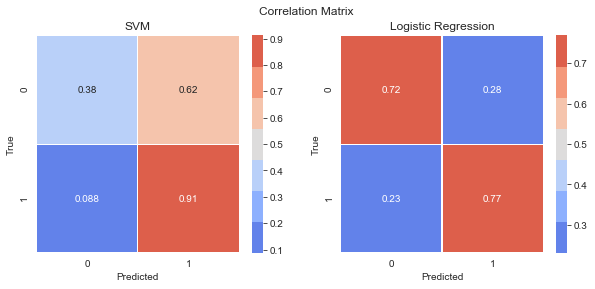

In [43]:
# Comparing LR and SVM Model

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(svm_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[0])
ax[0].set_title('SVM')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(lr_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[1])
ax[1].set_title('Logistic Regression')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

fig.savefig("correlation_.png", dpi=600)

In [44]:
# Conclusion
# No algorithm will predict churn with 100% accuracy. 
# There will always be a trade-off between precision and recall. 
# That's why it's important to test and understand the strengths and 
# weaknesses of each classifier and get the best out of each. 
# 
# If the goal is to engage and reach out to the customers to prevent them 
# from churning, it's acceptable to engage with those who are mistakenly 
# tagged as 'not churned,' as it does not cause any negative problem. 
# It could potentially make them even happier with the service. 
# This is the kind of model that can add value from day one if proper 
# action is taken out of it.